In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [4]:
df.info()             # Help us better understand dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [5]:
df.describe()                     # Helps us better understand numerical data   

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [6]:
## From above table we can come to conclusion that Data set doesn't have missing data 10 categorical feature and 7 numerical feature including output feature

In [7]:
print("Deposit :\n",df.deposit.value_counts())

Deposit :
 no     4428
yes    3943
Name: deposit, dtype: int64


#### From Data we observe 3943 poeple made deposit while 4428 people didn't

## Exploratory Data analysis

In [8]:
## lets observe categorical features 

In [9]:
print("Job:",df.job.value_counts())
print("\n")
print("Marital:",df.marital.value_counts())
print("\n")
print("Education:",df.education.value_counts())
print("\n")
print("Default:",df.default.value_counts())
print("\n")
print("Housing loan:",df.housing.value_counts())
print("\n")
print("Personal loan:",df.loan.value_counts())
print("\n")
print("Contact:",df.contact.value_counts())
print("\n")
print("Month:",df.month.value_counts())
print("\n")
print("Day:",df.day.value_counts())
print("\n")
print("Previous outcome:",df.poutcome.value_counts())
print("\n")

Job: management       1923
blue-collar      1472
technician       1371
admin.           1017
services          671
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         197
unknown            51
Name: job, dtype: int64


Marital: married     4744
single      2645
divorced     982
Name: marital, dtype: int64


Education: secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64


Default: no     8244
yes     127
Name: default, dtype: int64


Housing loan: no     4354
yes    4017
Name: housing, dtype: int64


Personal loan: no     7250
yes    1121
Name: loan, dtype: int64


Contact: cellular     6041
unknown      1763
telephone     567
Name: contact, dtype: int64


Month: may    2135
jul    1152
aug    1150
jun     912
nov     698
apr     661
feb     595
oct     280
jan     257
sep     241
mar     199
dec      91
Name: month, dtype: int64


Day: 20    435
18    422
5     

In [10]:
# From above table we can observe that 'default' column is clearly unbalanced so we drop it 

In [11]:
df=df.drop(columns='default',axis=1)

In [12]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,management,married,tertiary,388,no,no,cellular,25,may,272,1,-1,0,unknown,yes
8367,39,services,married,secondary,2758,no,no,cellular,4,feb,658,3,-1,0,unknown,yes
8368,38,blue-collar,married,primary,178,yes,no,unknown,20,may,245,1,-1,0,unknown,no
8369,59,retired,divorced,unknown,-49,yes,no,unknown,13,may,248,2,-1,0,unknown,no


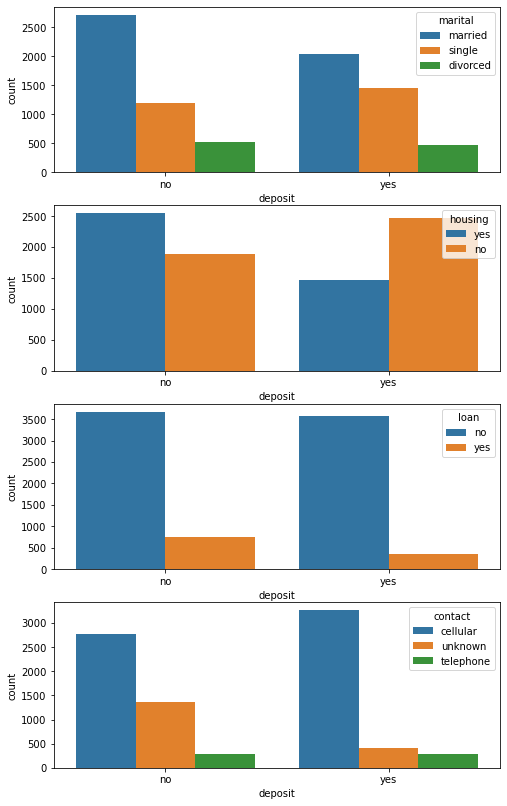

In [13]:
plt.figure(figsize=(8,14))
lst=['marital','housing','loan','contact']
for hue_label in lst:
    plt.subplot(4,1,lst.index(hue_label)+1)
    sns.countplot(x='deposit',data=df,hue=hue_label)

In [14]:
# From 1st plot we can observe most deposits are made by married people followed bysingle then divorced 
#but rejection rate is also in same order

# From 2 nd plot we can observe that people with no housing loan are more likely to make a deposit 

# From 3rd plot we can observe that people with no personal loan are more likely to make a deposit 

# From 4th plot we can observe that most deposits are made from cellular contace

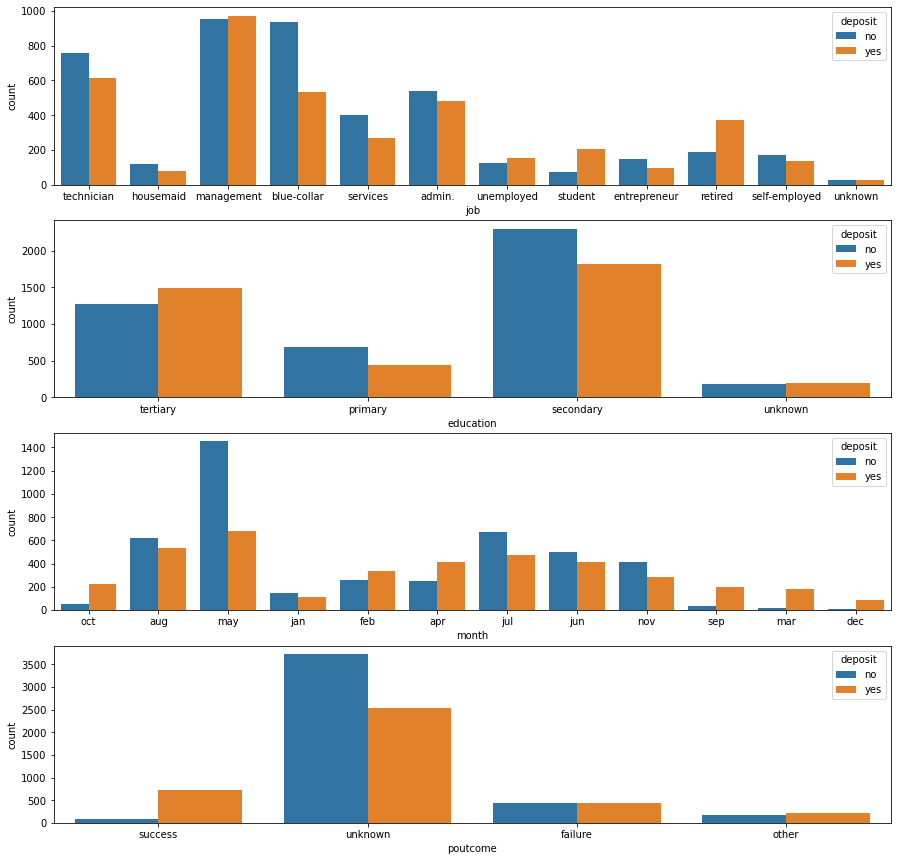

In [15]:
plt.figure(figsize=(15,15))
lst=['job','education','month','poutcome']
for x_label in lst:
    plt.subplot(4,1,lst.index(x_label)+1)
    sns.countplot(x=x_label,data=df,hue='deposit')

In [16]:
# From 1st plot we can obser that most deposits are made by people from management sector they are also most likely to make a deposit.
# Also the ratio of sucessfull deposit or not is least from people from blue collar sector

# From 2nd plot we can observe Most deposits are made by people with secondary education but for same number of people
#people tertiary education are most likely to `make deposit

# From 3rd plot we can people make most deposit in april and may 

# From 4th plot we can observe that people with poutcome success are most likely to make deposit again

#### lets observe numerical features

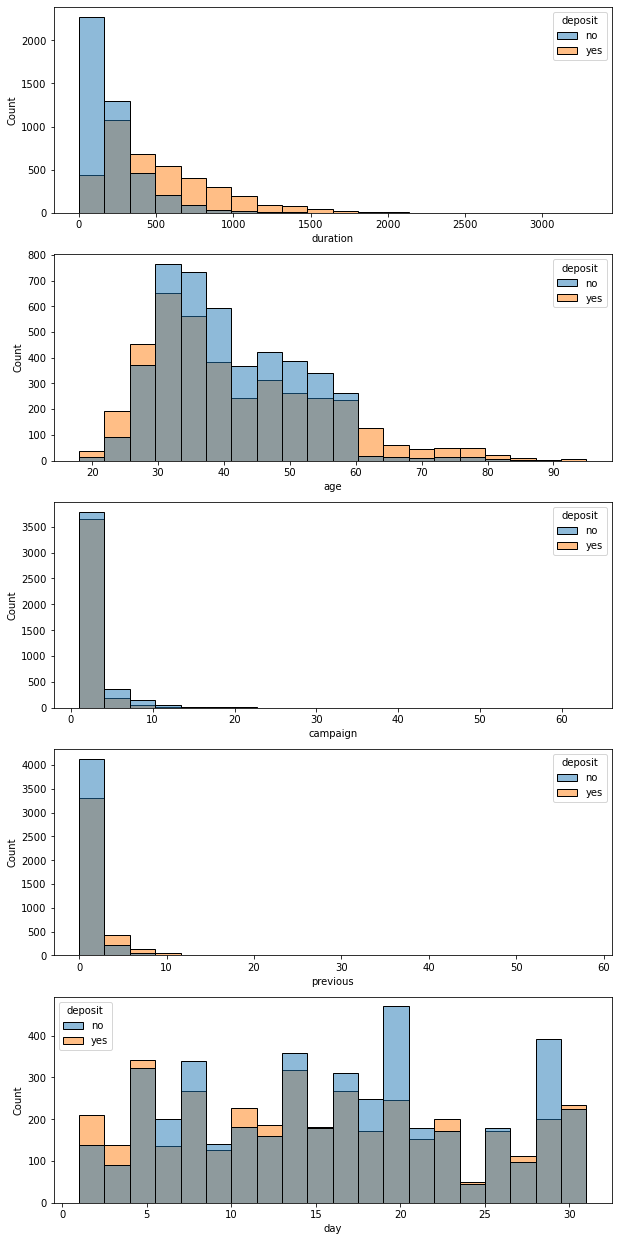

In [17]:
plt.figure(figsize=(10,22))
lst=['duration','age','campaign','previous','day']
for x_label in lst:
    plt.subplot(5,1,lst.index(x_label)+1)
    sns.histplot(df,x=x_label,bins=20,hue='deposit')

In [18]:
#From 1st graph we can observe that the longer the duration of call more are the chances of sucessul deposit

#From 2nd graph we can observe that  most deposits are made to age group 25 to 60.But we can also observe that 
#Younger poople and older people are more likely to make a deposit when contacted compared to middle age people

#From 3rd graph we can observe that most people who make deposit will most likely do so in first 10 contacts

#From 4th graph we can observe that people who are contacted less time are more likely to make donation


<AxesSubplot:xlabel='pdays', ylabel='Count'>

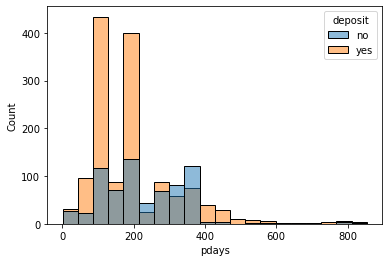

In [19]:
sns.histplot(df[df['pdays']!=-1],x='pdays',bins=20,hue='deposit')   
# We don't include pdays value -1 because they are not contacted
## From plot we can observe that people contacted between 100 to 200 days are most likely to make deposit

<AxesSubplot:>

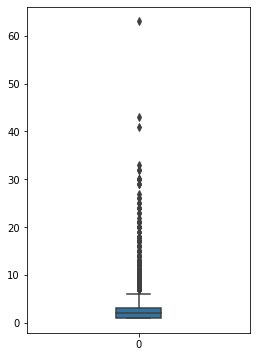

In [20]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df['campaign'],orient='v',width=0.2) 
# From graph we can see most clients have been reached by the bank for one to three times, which is reasonable.
# However, some clients have been contacted by as high as 58 times, which is not normal

In [21]:
df['deposit']=pd.get_dummies(df['deposit'],drop_first=True) #Convert output feature(deposit) into numerical feature

In [22]:
df.head() #No in deposit 0=No and 1= Yes

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,127,yes,no,cellular,14,oct,113,1,50,2,success,0
1,41,housemaid,married,primary,365,no,no,cellular,8,aug,203,5,-1,0,unknown,0
2,39,management,single,tertiary,2454,yes,no,cellular,4,may,716,3,263,2,failure,1
3,49,blue-collar,married,primary,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,0
4,37,services,married,secondary,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,0


In [23]:
df.corr()   #correlation between numerical features 

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.104354,0.008219,-0.001718,-0.002247,0.005537,0.027417,0.035981
balance,0.104354,1.000000,0.017427,0.019063,-0.017490,0.011066,0.014568,0.072905
day,0.008219,0.017427,1.000000,-0.021057,0.132670,-0.085508,-0.064294,-0.060022
duration,-0.001718,0.019063,-0.021057,1.000000,-0.045355,-0.028811,-0.029799,0.453144
campaign,-0.002247,-0.017490,0.132670,-0.045355,1.000000,-0.104697,-0.051024,-0.123973
pdays,0.005537,0.011066,-0.085508,-0.028811,-0.104697,1.000000,0.513477,0.149272
previous,0.027417,0.014568,-0.064294,-0.029799,-0.051024,0.513477,1.000000,0.140405
deposit,0.035981,0.072905,-0.060022,0.453144,-0.123973,0.149272,0.140405,1.000000


<AxesSubplot:>

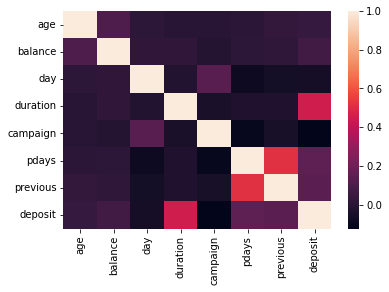

In [24]:
sns.heatmap(df.corr())       #Visual representation of correlation between numerical features 
                            #This help us better understand how features are realted to each other and output feature
                            # The correaltion between previous and pdays is really high
                            # Duration highly correlate with output but is useless in real world and only good for benchmark

In [25]:
# To make prediction model we convert categorical feature into numerical feature

### Handling categorical feature 

In [26]:
# We will use label encoding to handle categorical feature

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
c_feature=["job","marital","education","housing","loan","month","poutcome","contact"]
for i in c_feature:
    df[i]=le.fit_transform(df[i])

In [29]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,9,1,2,127,1,0,0,14,10,113,1,50,2,2,0
1,41,3,1,0,365,0,0,0,8,1,203,5,-1,0,3,0
2,39,4,2,2,2454,1,0,0,4,8,716,3,263,2,0,1
3,49,1,1,0,6215,1,0,0,11,8,549,1,-1,0,3,0
4,37,7,1,1,1694,1,1,0,29,4,404,2,251,6,0,0


### Now we can start prediction models 

In [30]:
X=df.iloc[:,:-1]
y=df.deposit

In [31]:
X

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,9,1,2,127,1,0,0,14,10,113,1,50,2,2
1,41,3,1,0,365,0,0,0,8,1,203,5,-1,0,3
2,39,4,2,2,2454,1,0,0,4,8,716,3,263,2,0
3,49,1,1,0,6215,1,0,0,11,8,549,1,-1,0,3
4,37,7,1,1,1694,1,1,0,29,4,404,2,251,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,4,1,2,388,0,0,0,25,8,272,1,-1,0,3
8367,39,7,1,1,2758,0,0,0,4,3,658,3,-1,0,3
8368,38,1,1,0,178,1,0,2,20,8,245,1,-1,0,3
8369,59,5,0,3,-49,1,0,2,13,8,248,2,-1,0,3


In [32]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8366    1
8367    1
8368    0
8369    0
8370    1
Name: deposit, Length: 8371, dtype: uint8

### Train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=1)

### 1.Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV     #We use Hyperparameter tuning to increase accuracy of Logistic regression

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
lr=LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
lr_cv.fit(X_train, y_train)

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [35]:
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7576104746317511


In [36]:
lr=LogisticRegression(C=0.05179474679231213)               ##We found out that best value of C from hyperparameter tuning
lr.fit(X_train,y_train)

C:\Users\Sanchay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.05179474679231213)

In [37]:
y_predict=lr.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_predict)

In [39]:
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",classification_report(y_test, y_predict))

Confusion Matrix:
 [[977 208]
 [313 763]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1185
           1       0.79      0.71      0.75      1076

    accuracy                           0.77      2261
   macro avg       0.77      0.77      0.77      2261
weighted avg       0.77      0.77      0.77      2261



### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Decision Tree Test Accuracy 78.73%


### Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state = 40)
rf_para={'n_estimators':[20, 65, 110, 155, 200],'max_features': ['auto', 'sqrt'],'max_depth': [1, 23, 45],'min_samples_split':[5, 10]}
rf_cv=GridSearchCV(rf, rf_para, cv = 3,verbose=2, n_jobs = 4)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40), n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [43]:
print("Random forest best parameters Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Random forest best parameters Parameters: {'max_depth': 23, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}
Best score is 0.8382979708400485


In [44]:
rf = RandomForestClassifier(n_estimators=200,max_depth=23, max_features="auto", min_samples_split=10)#We perform random forest fir with best parameters
rf.fit(X_train, y_train)
y_predi = rf.predict(X_test)

In [45]:
cm_rf=confusion_matrix(y_test,y_predi)         #We check the performance of our model
print("Confusion Matrix:\n",cm_rf)
print("Classification Report:\n",classification_report(y_test, y_predi))

Confusion Matrix:
 [[989 196]
 [130 946]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1185
           1       0.83      0.88      0.85      1076

    accuracy                           0.86      2261
   macro avg       0.86      0.86      0.86      2261
weighted avg       0.86      0.86      0.86      2261



## We get highest accuracy from Random Forest model so we use it for data prediction